In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-nonlineqn-newton)=
# Newton's method

Newton's method is the cornerstone of rootfinding. We introduce the key idea with an example in {numref}`Demo %s <demo-newton-line>`.

(demo-newton-line)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

Suppose we want to find a root of the function

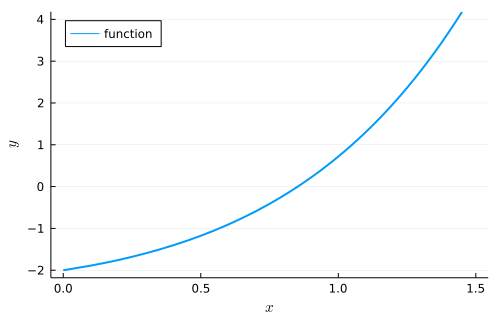

In [2]:
f = x -> x*exp(x) - 2

plot(f,0,1.5,label="function",
    grid=:y,ylim=[-2,4],xlabel=L"x",ylabel=L"y",legend=:topleft)

From the graph, it is clear that there is a root near $x=1$. So we call that our initial guess, $x_1$.

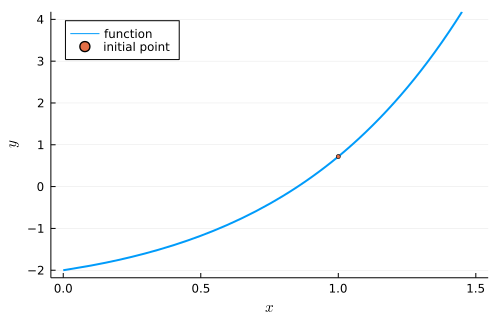

In [3]:
x₁ = 1
y₁ = f(x₁)
scatter!([x₁],[y₁],label="initial point")

Next, we can compute the tangent line at the point $\bigl(x_1,f(x_1)\bigr)$, using the derivative.

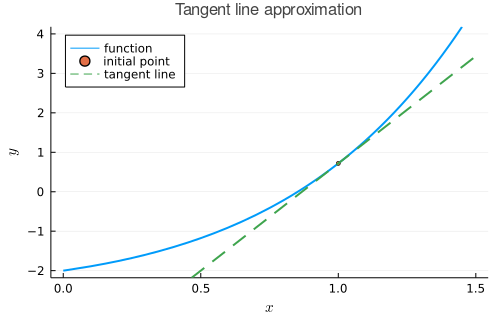

In [4]:
dfdx = x -> exp(x)*(x+1)
m₁ = dfdx(x₁)
tangent = x -> y₁ + m₁*(x-x₁)

plot!(tangent,0,1.5,l=:dash,label="tangent line",
    title="Tangent line approximation")

In lieu of finding the root of $f$ itself, we settle for finding the root of the tangent line approximation, which is trivial. Call this $x_2$, our next approximation to the root.

x₂ = x₁ - y₁ / m₁ = 0.8678794411714423


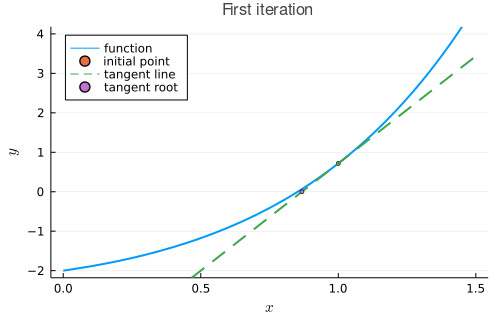

In [5]:
@show x₂ = x₁ - y₁/m₁
scatter!([x₂],[0],label="tangent root",title="First iteration")

In [6]:
y₂ = f(x₂)

0.06716266657572145

The residual (i.e., value of $f$) is smaller than before, but not zero. So we repeat the process with a new tangent line based on the latest point on the curve.

x₃ = x₂ - y₂ / m₂ = 0.8527833734164099


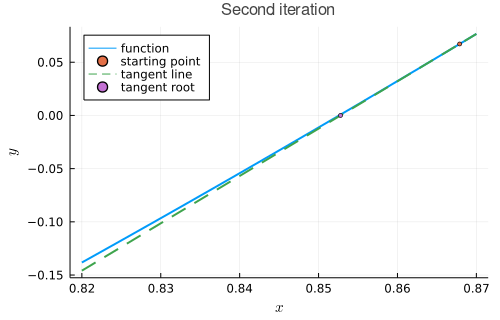

In [7]:
plot(f,0.82,0.87,label="function",legend=:topleft,
    xlabel=L"x",ylabel=L"y",title="Second iteration")

scatter!([x₂],[y₂],label="starting point")

m₂ = dfdx(x₂)
tangent = x -> y₂ + m₂*(x-x₂)
plot!(tangent,0.82,0.87,l=:dash,label="tangent line")

@show x₃ = x₂ - y₂/m₂
scatter!([x₃],[0],label="tangent root")

In [8]:
y₃ = f(x₃)

0.0007730906446230534

Judging by the residual, we appear to be getting closer to the true root each time.
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

Using general notation, if we have a root approximation $x_k$, we can construct a **linear model** of $f(x)$ using the classic formula for the tangent line of a differentiable function,

```{math}
  :label: tangentline
  q(x) = f(x_k) + f'(x_k)(x-x_k).
```

Finding the root of $q(x)=0$ is trivial. We define the next approximation by the condition $q(x_{k+1})=0$, which leads to the following.

```{index} ! Newton's method
```

(algorithm-nonlineqn-newton)=
::::{proof:algorithm} Newton's method
Given a function $f$, its derivative, $f'$, and an initial value $x_1$, iteratively define

```{math}
  :label: newton
  x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}, \qquad k=1,2,\ldots.
```
::::

## Convergence

The graphs of {numref}`Demo %s <demo-newton-line>` suggest why the Newton iteration may converge to a root: any differentiable function looks more and more like its tangent line as we zoom in to the point of tangency. Yet it is far from clear that it *must* converge, or at what rate it will do so. The matter of the convergence rate is fairly straightforward to resolve. Define the error sequence

```{math}
:label: errorseq
\epsilon_k = x_k - r , \quad k=1,2,\ldots,
```

where $r$ is the limit of the sequence and $f(r)=0$. Exchanging $x$-values for $\epsilon$-values in {eq}`newton` gives

```{math}
  \epsilon_{k+1}+r = \epsilon_k + r - \frac{f(r+\epsilon_k)}{f'(r+\epsilon_k)}.
```

We assume that $|\epsilon_k|\to 0$; eventually, the errors remain as small as we please forever. Then a Taylor expansion of $f$ about $x=r$ gives

```{math}
  \epsilon_{k+1} = \epsilon_k - \frac{ f(r) + \epsilon_kf'(r) + \frac{1}{2}\epsilon_k^2f''(r) +
    O(\epsilon_k^3)}{ f'(r) + \epsilon_kf''(r) + O(\epsilon_k^2)}.
```

We use the fact that $f(r)=0$ and additionally assume now that $r$ is a simple root, i.e., $f'(r)\neq 0$. Then

```{math}
\epsilon_{k+1} = \epsilon_k - \epsilon_k \left[ 1 + \dfrac{1}{2}\dfrac{f''(r)}{f'(r)} \epsilon_k
+ O(\epsilon_k^2)\right] \, \left[ 1 + \dfrac{f''(r)}{f'(r)}\epsilon_k + O(\epsilon_k^2)\right]^{-1}.
```

The series in the denominator is of the form $1/(1+z)$. Provided $|z|<1$, this is the limit of the geometric series $1-z+z^2-z^3 + \cdots$. Keeping only the lowest-order terms, we derive

```{math}
:label: newtonerr
\begin{split}
\epsilon_{k+1} &= \epsilon_k - \epsilon_k \left[ 1 + \dfrac{1}{2}\dfrac{f''(r)}{f'(r)} \epsilon_k + O(\epsilon_k^2) \right] \, \left[ 1 - \dfrac{f''(r)}{f'(r)}
\epsilon_k + O(\epsilon_k^2) \right]\\
&= \frac{1}{2}\, \frac{f''(r)}{f'(r)} \epsilon_k^2 + O(\epsilon_k^3).
\end{split}
```

::::{proof:observation}
Asymptotically, each iteration of Newton's method roughly squares the error.
::::

```{index} ! quadratic convergence
```

```{index} ! convergence rate; quadratic
```

::::{proof:definition} Quadratic convergence
Suppose a sequence $x_k$ approaches limit $x^*$. If the error sequence $\epsilon_k=x_k - x^*$ satisfies

```{math}
  :label: quadratic-convergence
  \lim_{k\to\infty} \frac{|\epsilon_{k+1}|}{|\epsilon_k|^2} = L
```

for a positive constant $L$, then the sequence has **quadratic convergence** to the limit.
::::

Recall that linear convergence is identifiable by trending toward a straight line on a log-linear plot of the error. When the convergence is quadratic, no such straight line exists—the convergence keeps getting steeper. As a numerical test, note that $|\epsilon_{k+1}|\approx K |\epsilon_{k}|^2$ implies that as $k\to\infty$,

```{math}
:label: quadratictest
  \log |\epsilon_{k+1}| & \approx 2 \log |\epsilon_{k}| + L,\\
    \frac{\log |\epsilon_{k+1}|}{\log |\epsilon_{k}|} &\approx 2 + \frac{L}{\log |\epsilon_{k}|} \to 2. 
```

(demo-newton-converge)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We again look at finding a solution of $x e^x=2$ near $x=1$. To apply Newton's method, we need to calculate values of both the residual function $f$ and its derivative.

In [9]:
f = x -> x*exp(x) - 2;
dfdx = x -> exp(x)*(x+1);

We don't know the exact root, so we use `nlsolve` to determine a proxy for it.

In [10]:
r = nlsolve(x -> f(x[1]),[1.]).zero

1-element Vector{Float64}:
 0.852605502013726

We use $x_1=1$ as a starting guess and apply the iteration in a loop, storing the sequence of iterates in a vector.

In [11]:
x = [1;zeros(4)]
for k = 1:4
    x[k+1] = x[k] - f(x[k]) / dfdx(x[k])
end
x

5-element Vector{Float64}:
 1.0
 0.8678794411714423
 0.8527833734164099
 0.8526055263689221
 0.852605502013726

Here is the sequence of errors.

In [12]:
ϵ = @. x - r

5-element Vector{Float64}:
 0.14739449798627402
 0.015273939157716354
 0.00017787140268388235
 2.435519608212644e-8
 0.0

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
Because the error reaches machine epsilon so rapidly, we're going to use extended precision to allow us to take a few more iterations. We'll take the last iteration as the most accurate root estimate.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
A `BigFloat` uses 256 bits of precision, rather than 53 in `Float64`. But arithmetic is done by software emulation and is much slower.
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

In [13]:
x = [BigFloat(1);zeros(7)]
for k = 1:7
    x[k+1] = x[k] - f(x[k]) / dfdx(x[k])
end
r = x[end]

0.8526055020137254913464724146953174668984533001514035087721073946525150656742605

In [14]:
ϵ = @. Float64(x[1:end-1] - r)

7-element Vector{Float64}:
 0.14739449798627452
 0.01527393915771683
 0.00017787140268443004
 2.435519656311045e-8
 4.56680051680793e-16
 1.6056572825272187e-31
 1.9848810119594387e-62

The exponents in the scientific notation definitely suggest a squaring sequence. We can check the evolution of the ratio in {eq}`quadratictest`.

In [15]:
logerr = @. log(abs(ϵ))
[ logerr[i+1]/logerr[i] for i in 1:length(logerr)-1 ]

6-element Vector{Float64}:
 2.184014482339964
 2.0648638810676476
 2.0302996897413403
 2.014917265833641
 2.007403413131773
 2.003688054470438

The clear convergence to 2 above constitutes good evidence of quadratic convergence. 
```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```


```{index} roots; multiplicity of
```

Let's summarize the assumptions made to derive quadratic convergence as given by {eq}`newtonerr`:

1. The residual function $f$ has to have enough continuous derivatives to make the Taylor series expansion valid. Often this is stated as $f$ having sufficient *smoothness*. This is usually not a problem, but see [Exercise 6](problem-newton-alternate).
2. We required $f'(r)\neq 0$, meaning that $r$ must be a simple root. See [Exercise 7](problem-newton-multiple) to investigate what happens at a multiple root.
3. We assumed that the sequence converged, which is not easy to guarantee in any particular case. In fact,
finding a starting value from which the Newton iteration converges is often the most challenging part of a rootfinding problem. We will try to deal with this issue in {numref}`section-nonlineqn-quasinewton`.

## Implementation

Our implementation of Newton's iteration is given in {numref}`Function {number} <function-newton>`. It accepts functions that evaluate $f$ and $f'$ and the starting value $x_1$ as input arguments. Beginning programmers are tempted to embed $f$ and $f'$ directly into the code, but there are two good reasons not to do so. First, each new rootfinding problem would require its own copy of the code, creating a lot of duplication. Second, you may want to try more than one rootfinding algorithm for a particular problem, and keeping the definition of the problem separate from the algorithm for its solution makes this task much easier.  

```{index} ! Julia; keyword function arguments
```

```{index} ! Julia; break
```

(function-newton)=
````{proof:function} newton
**Newton's method for a scalar rootfinding problem**

```{code-block} julia1
:lineno-start: 1
"""
    newton(f,dfdx,x₁[;maxiter,ftol,xtol])

Use Newton's method to find a root of `f` starting from `x₁`, where
`dfdx` is the derivative of `f`. Returns a vector of root estimates.

The optional keyword parameters set the maximum number of iterations
and the stopping tolerance for values of `f` and changes in `x`.
"""
function newton(f,dfdx,x₁;maxiter=40,ftol=100*eps(),xtol=100*eps())
    x = [float(x₁)]
    y = f(x₁)
    Δx = Inf   # for initial pass below
    k = 1

    while (abs(Δx) > xtol) && (abs(y) > ftol)
        dydx = dfdx(x[k])
        Δx = -y/dydx            # Newton step
        push!(x,x[k]+Δx)        # append new estimate

        k += 1
        y = f(x[k])
        if k==maxiter
            @warn "Maximum number of iterations reached."
            break   # exit loop
        end
    end
    return x
end
```
````

```{admonition} About the code
:class: dropdown
{numref}`Function {number} <function-newton>` accepts *keyword arguments*. In the function declaration, these follow the semicolon, and when the function is called, they may be supplied as `keyword=value` in the argument list. Here, these arguments are also given default values by the assignments within the declaration. This arrangement is useful when there are multiple optional arguments, because the ordering of them doesn't matter.

The `break` statement, seen here in line 25, causes an immediate exit from the innermost loop in which it is called. It is often used as a safety valve to escape an iteration that may not be able to terminate otherwise.
```

```{index} backward error, residual
```

{numref}`Function {number} <function-newton>` also deals with a thorny practical issue: how to stop the iteration. It adopts a three-part criterion. First, it monitors the difference between successive root estimates, $|x_k-x_{k-1}|$, which is used as a stand-in for the unknown error $|x_k-r|$. In addition, it monitors the residual $|f(x_k)|$, which is equivalent to the backward error and more realistic to control in badly conditioned problems (see {numref}`section-nonlineqn-rootproblem`). If either of these quantities is considered to be sufficiently small, the iteration ends. Finally, we need to protect against the possibility of a nonconvergent iteration, so the procedure terminates with a warning if a maximum number of iterations is exceeded.

(demo-newton-usage)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

```{index} ! Julia; enumerate
```

::::{panels}
:column: col-7 left-side
:card: border-0 shadow-none
```{raw} latex
\begin{minipage}[t]{0.5\textwidth}
```
Suppose we want to evaluate the inverse of the function $h(x)=e^x-x$. This means solving $y=e^x-x$ for $x$ when $y$ is given, which has no elementary form. If a value of $y$ is given numerically, though, we simply have a rootfinding problem for $f(x)=e^x-x-y$.

```{raw} latex
\end{minipage}\hfill
```
---
:column: col-5 right-side
:card: shadow-none comment
```{raw} latex
\begin{minipage}[t]{0.4\textwidth}\begin{mdframed}[default]\small
```
The `enumerate` function produces a pair of values for each iteration: a positional index and the corresponding contents. 
```{raw} latex
\end{mdframed}\end{minipage}
```
::::

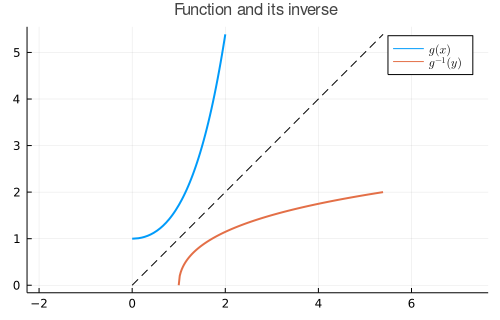

In [16]:
g = x -> exp(x) - x
dgdx = x -> exp(x) - 1
y = range(g(0),g(2),length=200)
x = zeros(length(y))
for (i,y) in enumerate(y)
    f = x -> g(x) - y
    dfdx = x -> dgdx(x)
    r = FNC.newton(f,dfdx,y)
    x[i] = r[end]
end

plot(g,0,2,aspect_ratio=1,label=L"g(x)")
plot!(y,x,label=L"g^{-1}(y)",title="Function and its inverse")
plot!(x->x,0,maximum(y),label="",l=(:dash,1),color=:black)

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Exercises

For each of Exercises 1–3, do the following steps.
  
**(a)** ✍ Rewrite the equation into the standard form for rootfinding, $f(x) = 0$, and compute $f'(x)$. 

**(b)** ⌨  Make a plot of $f$ over the given interval and determine how many roots lie in the interval. 

**(c)** ⌨ Use `nlsolve` with `ftol=1e-15` to find a reference value for each root. 

**(d)** ⌨ Use {numref}`Function {number} <function-newton>` to find each root.

**(e)** ⌨ For one of the roots, use the errors in the Newton sequence to determine numerically whether the convergence is roughly quadratic.

1. $x^2=e^{-x}$, over $[-2,2]$

2. $2x = \tan x$, over $[-0.2,1.4]$

3. $e^{x+1}=2+x$, over $[-2,2]$

    ---

4. ⌨  Plot the function $f(x)=x^{-2} - \sin x$ on the interval $x \in [0.5,10]$.  For each initial value $x_1=1,\, x_1=2,\,\ldots,\, x_1=7$, apply {numref}`Function {number} <function-newton>` to $f$, and make a table showing $x_1$ and the resulting root found by the method. In which case does the iteration converge to a root other than the one closest to it? Use the plot to explain why that happened.
  
5. ✍ Show that if $f(x)=x^{-1}-b$ for nonzero $b$, then Newton's iteration converging to the root $r=1/b$ can be implemented without performing any divisions. 

    (problem-newton-alternate)=
6. ✍ Discuss what happens when Newton's method is applied to find a root of $f(x) = \operatorname{sign}(x) \sqrt{|x|}$, starting at $x_1\ne 0$. (Hint: Write out both $f(x)$ and $f'(x)$ as piecewise functions.)

    (problem-newton-multiple)=
7. ✍ In the case of a multiple root, where $f(r)=f'(r)=0$, the derivation of the quadratic error convergence in {eq}`newtonerr` is invalid. Redo the derivation to show that in this circumstance and with $f''(r)\neq 0$, the error converges only linearly. 

8. ✍ In {numref}`Function {number} <function-newton>` and elsewhere, the actual error is not available, so we use $|x_k-x_{k-1}|$ as an approximate indicator of error to determine when to stop the iteration. Find an example that foils this indicator; that is, a sequence $\{x_k\}$ such that
  
    ```{math}
    \lim_{k\rightarrow \infty} (x_k-x_{k-1}) = 0,
    ```

    but $\{x_k\}$ diverges. (Hint: You have seen such sequences in calculus.) Hence the need for residual tolerances and safety valves in the code!